In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import CenteredNorm

from Common import *

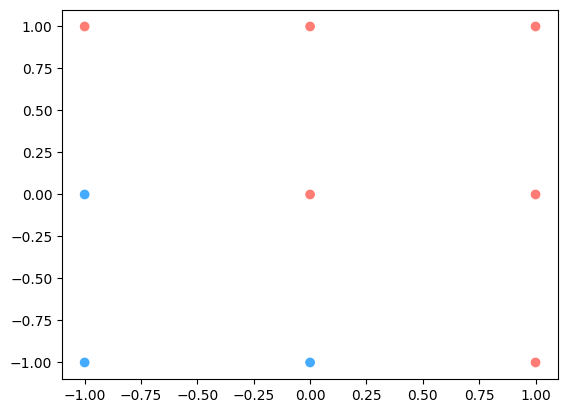

In [2]:
plt.scatter(input[:, 0], input[:, 1], c=expected, cmap=cmap)

In [3]:
W0 = np.array([[0.61275508, 0.98539237, 0.27266151],
               [-0.47399039, 0.66266751, -0.72721264]])
W1 = np.array([[0.96787958],
               [-0.80183257],
               [0.94478099]])

expected = expected.reshape(9, 1)

In [4]:
def run(i):
  x1 = np.matmul(i, W0)
  x2 = np.matmul(x1, W1)
  return (x2, x1)

In [5]:
x2, x1 = run(input)
loss = abs(expected - x2).sum()
loss

#np.column_stack([x2, expected])

15.94190645227356

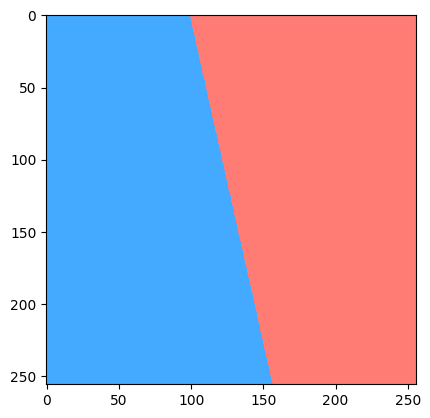

In [106]:
#plt.scatter(test[:, 0], test[:, 1], c=run(test)[0].squeeze(), cmap=cmap)
#plt.imshow(run(test)[0].reshape(256, 256), cmap=cmap, norm=CenteredNorm(0, 0.1))
plt.imshow(run(test)[0].reshape(256, 256), cmap=cmap)

Chain rule for backprop:
dL/dW1 = dL/dx2 * dx2/dW1 = dL/dx2 * x1
dL/dx1 = dL/dx2 * dx2/dx1
dL/dW0 = dL/dx1 * dx1/dW0 = dL/dx1 * x

In [107]:
# For each sample (the rows), in which direction does x2 need to be nudged
dLdX2 = -np.sign(expected - x2)
dLdX2

array([[-1.],
       [-1.],
       [-1.],
       [ 1.],
       [-0.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.]])

In [110]:
# For each sample, in which direction do each of the W1 weights need to be nudged
dLdW1PerSample = dLdX2 * x1
# Sum over samples to get overall update to W1
dLdW1 = dLdW1PerSample.sum(0)
dLdW1

array([ 1.61843218, -5.9467898 ,  3.81795282])

In [104]:
dLdX1 = np.outer(dLdX2, W1)
dLdX1

array([[-0.74129907, -0.030718  , -0.4102676 ],
       [-0.74129907, -0.030718  , -0.4102676 ],
       [-0.74129907, -0.030718  , -0.4102676 ],
       [ 0.74129907,  0.030718  ,  0.4102676 ],
       [-0.        , -0.        , -0.        ],
       [-0.74129907, -0.030718  , -0.4102676 ],
       [ 0.74129907,  0.030718  ,  0.4102676 ],
       [ 0.74129907,  0.030718  ,  0.4102676 ],
       [ 0.74129907,  0.030718  ,  0.4102676 ]])

In [111]:
f = lambda i, j: np.outer(i, j)
vecF = np.vectorize(f, signature='(m),(n)->(m,n)')

dLdW0PerSample = vecF(input, dLdX1)
dLdW0 = dLdW0PerSample.sum(0)
dLdW0

array([[-1.48259815, -0.061436  , -0.82053519],
       [-4.44779445, -0.18430801, -2.46160557]])

In [105]:
e = 1e-2
W0 -= e * dLdW0
W1 -= e * dLdW1.reshape(3, 1)

W0
W1

array([[ 0.86913188,  0.86972518,  0.4759188 ],
       [ 0.29514   ,  0.31566595, -0.11744078]])

array([[0.72511475],
       [0.0901859 ],
       [0.37208807]])